# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


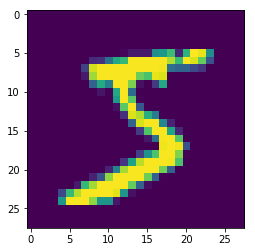

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:5]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))#3
model.add(Convolution2D(16, (3, 3), activation='relu'))#5
model.add(MaxPooling2D(pool_size=(2, 2)))#10
model.add(Convolution2D(16, 1, activation='relu'))#10
model.add(Convolution2D(16, (3, 3), activation='relu'))#12
model.add(MaxPooling2D(pool_size=(2, 2)))#24
model.add(Convolution2D(16, 1, activation='relu'))#24
model.add(Dropout(0.2))
model.add(Convolution2D(16, (3, 3), activation='relu'))#26
model.add(Dropout(0.1))
model.add(Convolution2D(16, (3, 3), activation='relu'))#28
model.add(Convolution2D(10, 1))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 16)        272       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 16)          272       
__________

The model is vanilla model. Using only convolution layer with kernel 3X3 and one Max pooling layer. So Total parameters generated/trained by this model is 51466.

In [12]:
#from keras.callbacks import LearningRateScheduler
#from keras.optimizers import Adam
#def scheduler(epoch, lr):
#  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=0,validation_data=(X_test, Y_test))
model.fit(X_train, Y_train, batch_size=64, nb_epoch=10, verbose=0,validation_data=(X_test, Y_test))
model.fit(X_train, Y_train, batch_size=128, nb_epoch=20, verbose=1,validation_data=(X_test, Y_test))#, callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 2048/60000 [>.............................] - ETA: 4s - loss: 0.0255 - acc: 0.9932

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


60000/60000 [==============================] - 4s 59us/step - loss: 0.0218 - acc: 0.9930 - val_loss: 0.0253 - val_acc: 0.9928
Epoch 2/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0219 - acc: 0.9925 - val_loss: 0.0218 - val_acc: 0.9928
Epoch 3/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0211 - acc: 0.9928 - val_loss: 0.0241 - val_acc: 0.9930
Epoch 4/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0213 - acc: 0.9928 - val_loss: 0.0217 - val_acc: 0.9931
Epoch 5/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0211 - acc: 0.9928 - val_loss: 0.0231 - val_acc: 0.9932
Epoch 6/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0213 - acc: 0.9929 - val_loss: 0.0261 - val_acc: 0.9918
Epoch 7/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0209 - acc: 0.9929 - val_loss: 0.0229 - val_acc: 0.9934
Epoch 8/20
60000/60000 [============================

Here Using default adam optimizer and loss function as categorical_crossentropy.

In [13]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.022638677411426035, 0.994]


In [0]:
y_pred = model.predict(X_test)

In [15]:
print(y_pred[:9])
print(y_test[:9])

[[1.72410287e-14 1.03354825e-10 9.91120608e-09 2.22641100e-10
  7.71927688e-14 4.96938636e-11 3.32714758e-20 1.00000000e+00
  5.57189538e-15 3.52106982e-10]
 [6.86011603e-08 5.65854934e-05 9.99943376e-01 9.54115453e-10
  6.15193660e-12 4.44691462e-12 8.30905211e-09 2.61944522e-10
  3.16441984e-09 9.11495272e-14]
 [1.48886947e-09 9.99992371e-01 2.97532345e-08 2.85410473e-10
  7.45343777e-06 2.21218510e-09 3.10004893e-08 1.39569877e-07
  1.06382236e-08 4.37807834e-08]
 [9.99986410e-01 1.93463889e-09 2.38779512e-06 2.13600804e-09
  7.54484697e-10 7.64137731e-09 1.11011077e-05 1.34168815e-10
  4.07031457e-08 5.63048026e-08]
 [2.51557564e-13 6.57866372e-10 6.69668973e-11 4.31359028e-12
  1.00000000e+00 4.15447232e-10 3.65598801e-10 3.55344060e-10
  6.88776924e-10 5.80731765e-08]
 [2.18699348e-09 9.99998689e-01 4.70263162e-09 2.33657677e-11
  1.27673979e-06 2.15215817e-10 4.61356553e-09 4.74261874e-08
  1.01608855e-09 3.18086251e-08]
 [3.25179204e-16 4.81801210e-10 1.68257864e-13 3.94968476e

In [16]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{'conv2d_1': <keras.layers.convolutional.Conv2D object at 0x7f5d75a0eac8>, 'conv2d_2': <keras.layers.convolutional.Conv2D object at 0x7f5d75a0ec50>, 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D object at 0x7f5d75a33b00>, 'conv2d_3': <keras.layers.convolutional.Conv2D object at 0x7f5d75a08160>, 'conv2d_4': <keras.layers.convolutional.Conv2D object at 0x7f5d75a0ef98>, 'max_pooling2d_2': <keras.layers.pooling.MaxPooling2D object at 0x7f5d751fcd68>, 'conv2d_5': <keras.layers.convolutional.Conv2D object at 0x7f5d751e86a0>, 'dropout_1': <keras.layers.core.Dropout object at 0x7f5d751fc7b8>, 'conv2d_6': <keras.layers.convolutional.Conv2D object at 0x7f5d751a7a90>, 'dropout_2': <keras.layers.core.Dropout object at 0x7f5d751a7860>, 'conv2d_7': <keras.layers.convolutional.Conv2D object at 0x7f5d75142f28>, 'conv2d_8': <keras.layers.convolutional.Conv2D object at 0x7f5d75142f60>, 'flatten_1': <keras.layers.core.Flatten object at 0x7f5d751146d8>, 'activation_1': <keras.layers.core.Activatio

Showcasing the different filters/channels.

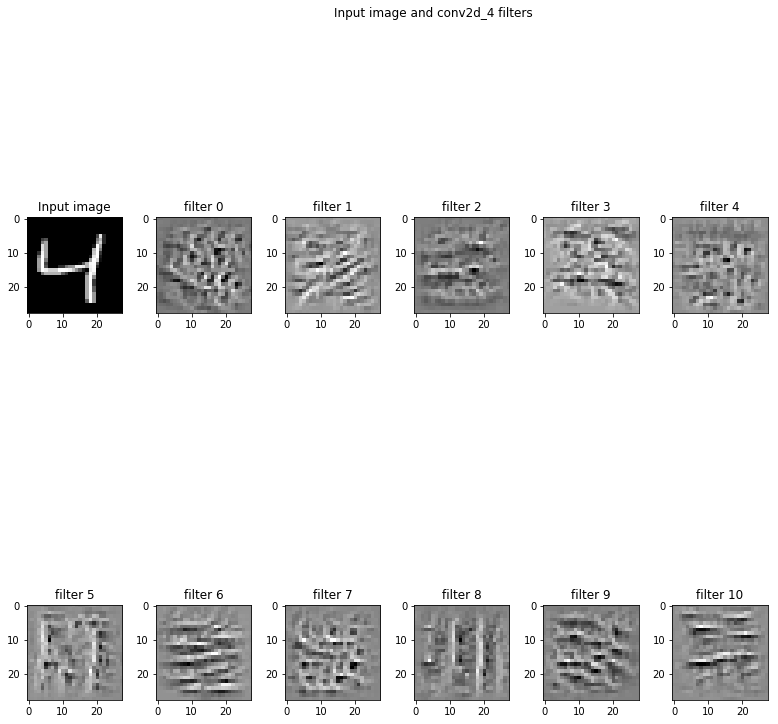

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_4'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()